#Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
data_file_url = "https://github.com/sobiero/ads-data-files/blob/master/bank-customer-churn.csv?raw=true"

In [3]:
raw_df = pd.read_csv(data_file_url)
df = raw_df

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#EDA

In [6]:
df.groupby(['Geography']).count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
ft_gender = df.groupby(['Gender']).size().reset_index(name='Count').rename(columns={'Gender':'Gender'})
ft_gender

,Gender,Count
0,Female,4543
1,Male,5457


<BarContainer object of 2 artists>

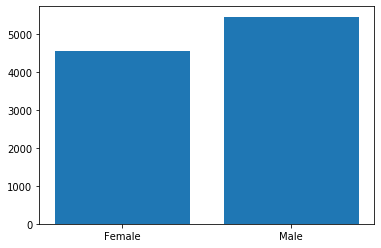

In [9]:
plt.bar(ft_gender['Gender'],ft_gender['Count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b38533a50>,
      dtype=object)

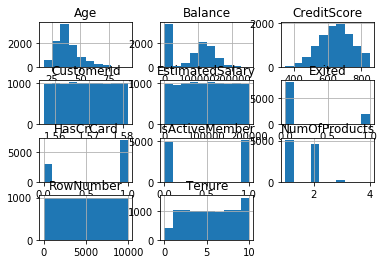

In [10]:
df.hist()

In [11]:
df["Age"].describe() #EstimatedSalary

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [12]:
age_ranges = ["[{0} - {1})".format(Age, Age + 10) for Age in range(10, 92, 10)]
age_ranges

['[10 - 20)',
 '[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [13]:
df['Age_Range'] = pd.cut(x=df['Age'], bins=len(age_ranges), labels=age_ranges)

In [14]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Range
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,[30 - 40)
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,[30 - 40)
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,[30 - 40)
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,[30 - 40)
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,[40 - 50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,[30 - 40)
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,[30 - 40)
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,[30 - 40)
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,[30 - 40)


In [15]:
df_age_range_hist = pd.DataFrame( df['Age_Range'].value_counts() ) .reset_index()
df_age_range_hist.columns = ['Age_Range', 'Count']
df_age_range_hist

,Age_Range,Count
0,[30 - 40),3427
1,[20 - 30),2868
2,[40 - 50),1633
3,[10 - 20),811
4,[50 - 60),735
5,[60 - 70),334
6,[70 - 80),147
7,[80 - 90),39
8,[90 - 100),6


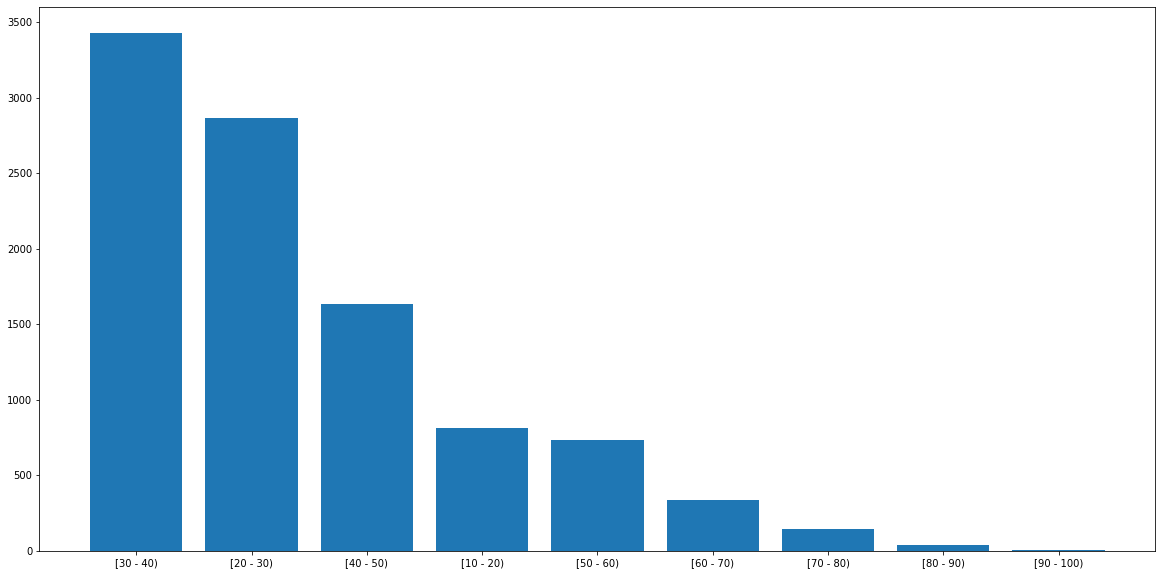

In [16]:
plt.figure(figsize=(20,10))
plt.bar(df_age_range_hist["Age_Range"], df_age_range_hist["Count"])
plt.show()

In [17]:
#Feature Eng and Feature Selection

In [18]:
categorical = [var for var in raw_df.columns if raw_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 3 categorical variables


['Surname', 'Geography', 'Gender']

In [19]:
numerical = [var for var in raw_df.columns if raw_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
numerical

There are 12 numerical variables


['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Age_Range']

In [20]:
# let's visualise the percentage of missing values for each variable
missing = False
for var in df.columns:
    if df[var].isnull().sum():
        missing = True
        print(var, df[var].isnull().mean())       
if missing == False:
    print("No missing values")

No missing values


In [21]:
# let's no determine how many variables we have with missing information
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]
print('Total variables that contain missing information: ', len(vars_with_na))

Total variables that contain missing information:  0


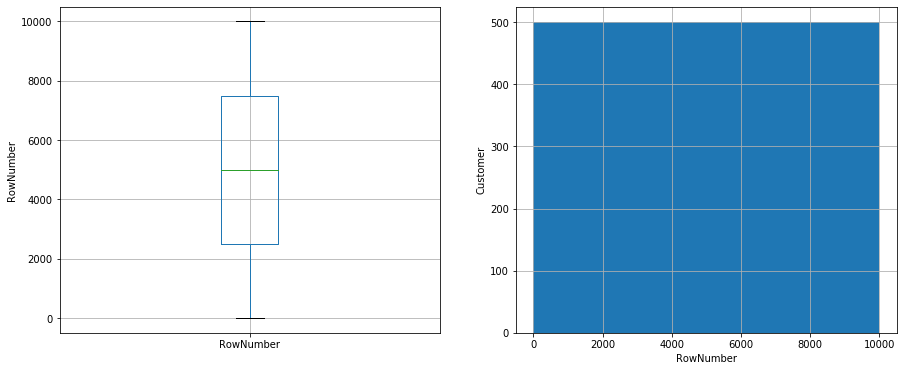

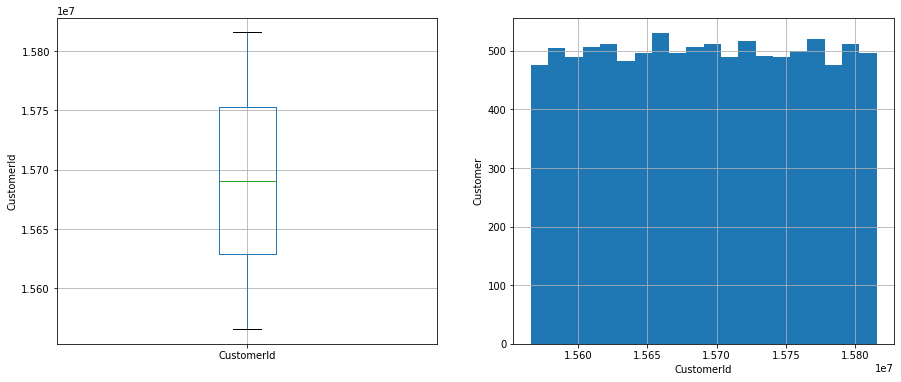

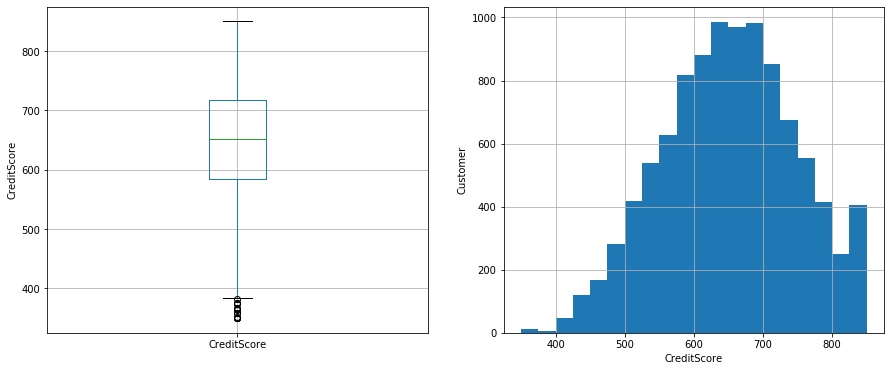

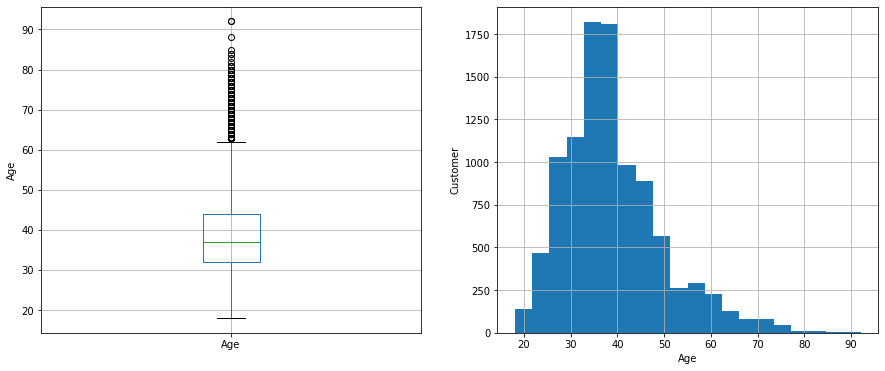

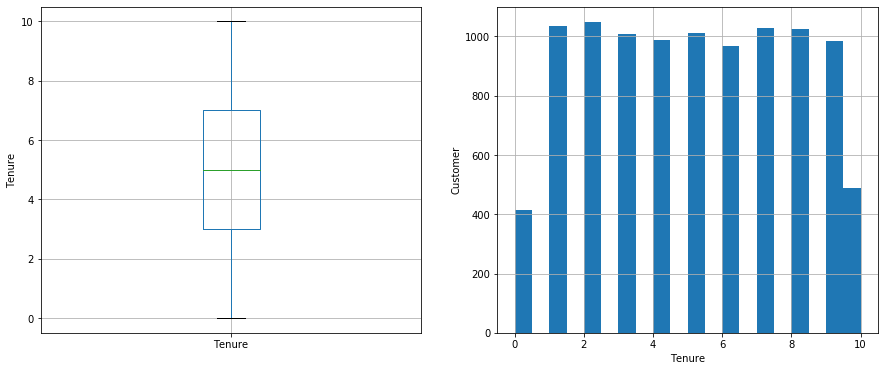

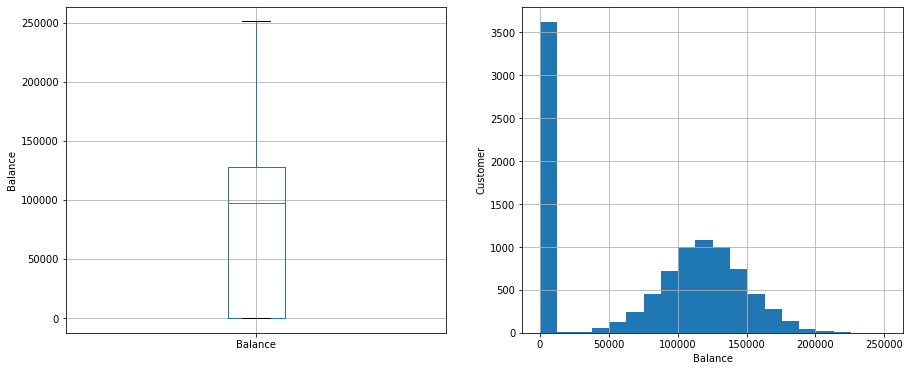

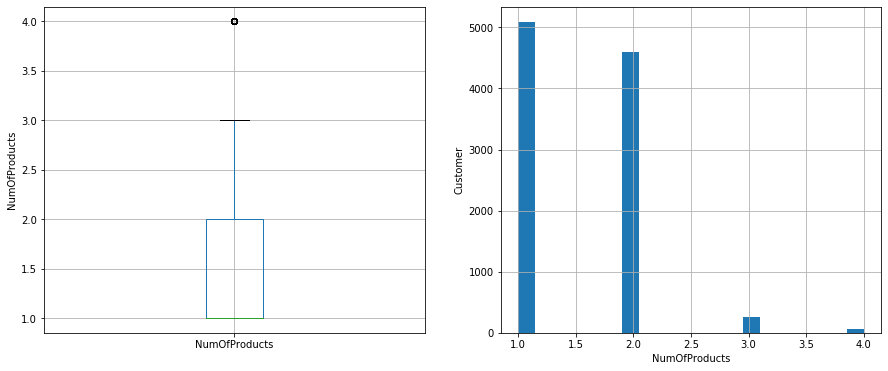

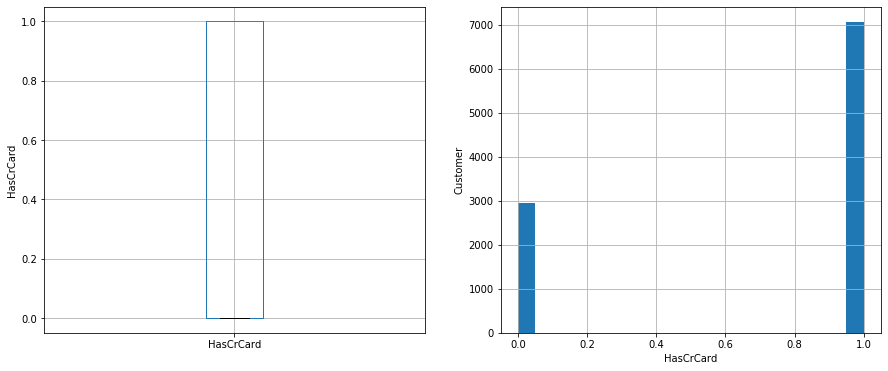

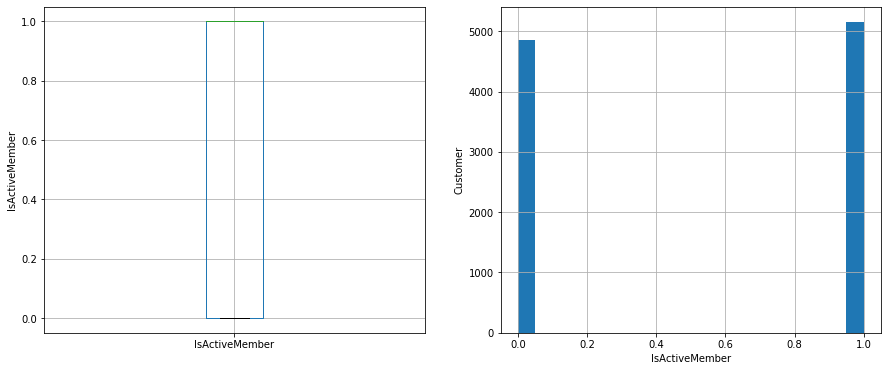

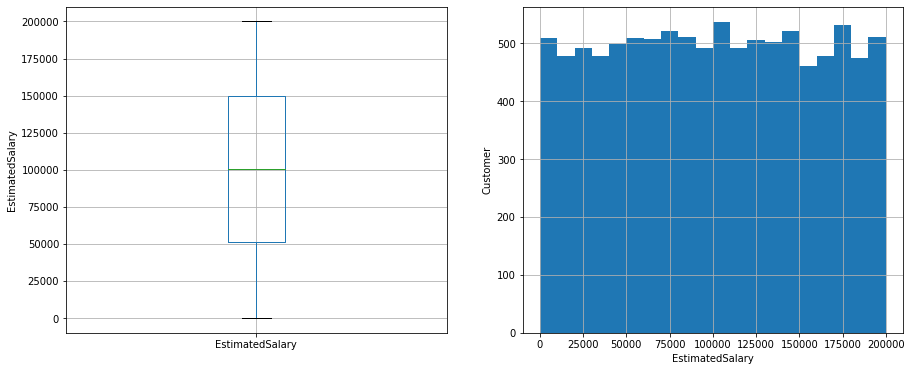

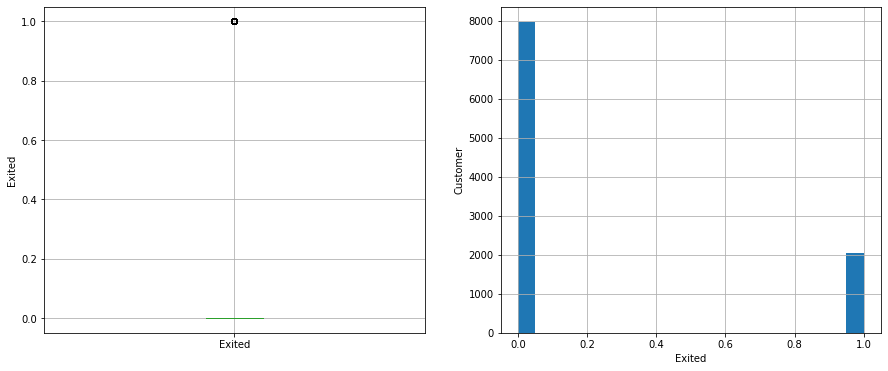

KeyError: "None of [Index(['Age_Range'], dtype='object')] are in the [columns]"

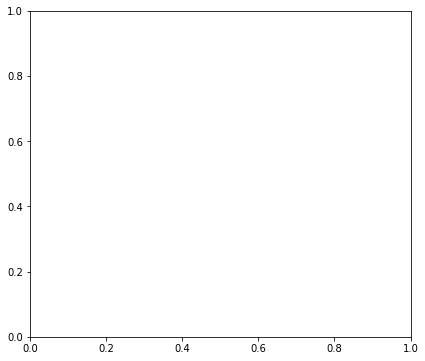

In [22]:
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = raw_df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = raw_df[var].hist(bins=20)
    fig.set_ylabel('Customer')
    fig.set_xlabel(var)

    plt.show()

In [23]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Range
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,[30 - 40)
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,[30 - 40)
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,[30 - 40)
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,[30 - 40)
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,[40 - 50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,[30 - 40)
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,[30 - 40)
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,[30 - 40)
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,[30 - 40)


In [24]:
#Remove irrelevant features to ML
train_df = df.copy()
train_df.drop(['RowNumber', 'Age_Range', 'CustomerId', 'Surname'], axis='columns', inplace=True)
train_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
#features = ["Gender", "Geography", ]
train_df = pd.get_dummies(train_df)
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [26]:
y = train_df['Exited'].values
X = train_df.drop(columns = ['Exited'])

In [28]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [30]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0,0.0,1.0


#ML

##Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_jobs=-1,random_state=42)
model_rfr.fit( X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [33]:
model_rfr.score(X, y)

0.9070520129580656

In [34]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

##Logistic Regression

In [35]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
result = model_lr.fit(X_train, y_train)

In [37]:
from sklearn import metrics
prediction_test = model_lr.predict(X_test)
# # Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test.round(), normalize=True))  #accuracy_score(y_true, y_pred.round(), normalize=False)

0.81


In [38]:
##xgboost

In [39]:
import xgboost as xgb

In [40]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [41]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
print (metrics.accuracy_score(y_test, preds.round(), normalize=True))  

0.8018


In [42]:
##xgboost tuned

In [43]:
xg_reg_tuned = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.99, learning_rate = 0.9,
                max_depth = 3, alpha = 10, n_estimators = 5)
xg_reg_tuned.fit(X_train,y_train)

preds = xg_reg_tuned.predict(X_test)
print (metrics.accuracy_score(y_test, preds.round(), normalize=True))  

0.8616


#cross Validation

In [44]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [45]:
# Using score()
clf.score(X_test, y_test)

0.8636

In [46]:
# Using cross_val_score()
cross_val_score(clf, X, y)

array([0.8585, 0.871 , 0.861 , 0.8675, 0.8575])

In [47]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8636, 0.8629999999999999)

In [48]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.8585, 0.8695, 0.8585, 0.8665, 0.8585])

In [59]:
##Accuracy

In [60]:
# Accuracy as percentage
print(f"Bank Customers' Churn Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Bank Customers' Churn Classifier Accuracy: 86.36%


##ROC Curve

In [49]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.51126690e-04,
       7.51126690e-04, 1.00150225e-03, 1.00150225e-03, 1.50225338e-03,
       1.75262894e-03, 2.25338007e-03, 2.25338007e-03, 2.25338007e-03,
       2.25338007e-03, 2.75413120e-03, 3.50525789e-03, 4.25638458e-03,
       5.25788683e-03, 5.25788683e-03, 5.25788683e-03, 5.50826239e-03,
       6.25938908e-03, 6.76014021e-03, 7.26089134e-03, 8.01201803e-03,
       9.01352028e-03, 1.00150225e-02, 1.02653981e-02, 1.10165248e-02,
       1.20180270e-02, 1.37706560e-02, 1.62744116e-02, 1.72759139e-02,
       1.87781673e-02, 2.00300451e-02, 2.12819229e-02, 2.22834251e-02,
       2.40360541e-02, 2.47871808e-02, 2.55383075e-02, 2.82924387e-02,
       2.95443165e-02, 3.12969454e-02, 3.22984477e-02, 3.45518277e-02,
       3.63044567e-02, 3.90585879e-02, 4.15623435e-02, 4.58187281e-02,
       5.05758638e-02, 5.35803706e-02, 5.78367551e-02, 6.05908863e-02,
       6.40961442e-02, 6.73510265e-02, 7.16074111e-02, 7.43615423e-02,
      

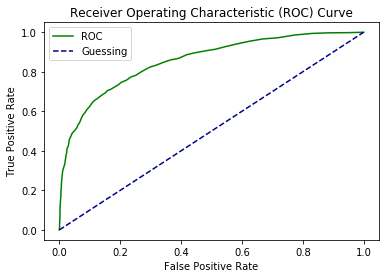

In [57]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='green', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.8548721442003959